# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [7]:
# your code here- numerical variable
titanic.select_dtypes(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [8]:
#your code here- categorical variable
titanic.select_dtypes(exclude=[np.number])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [72]:
# your code here
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
plt.figure(figsize=(1, 1))

<Figure size 80x80 with 0 Axes>

<Figure size 80x80 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

<AxesSubplot:xlabel='Age', ylabel='Count'>

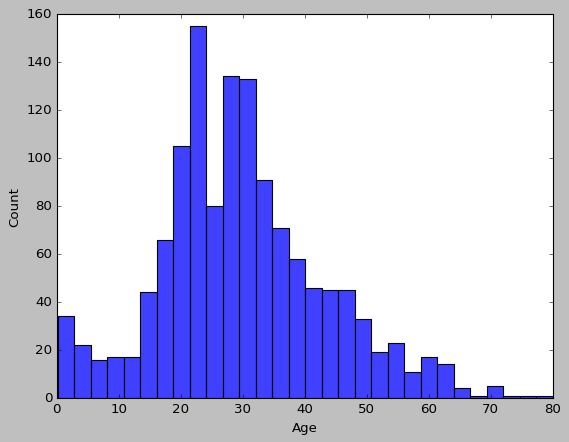

In [73]:
# your code here
sns.histplot(titanic.Age)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

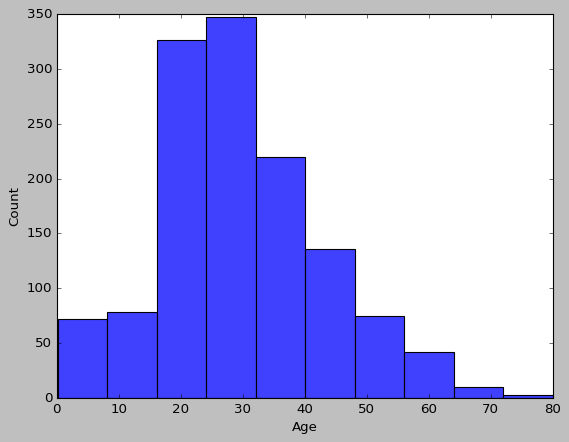

In [74]:
# your code here
subplot_1 = sns.histplot(titanic.Age, bins=10)

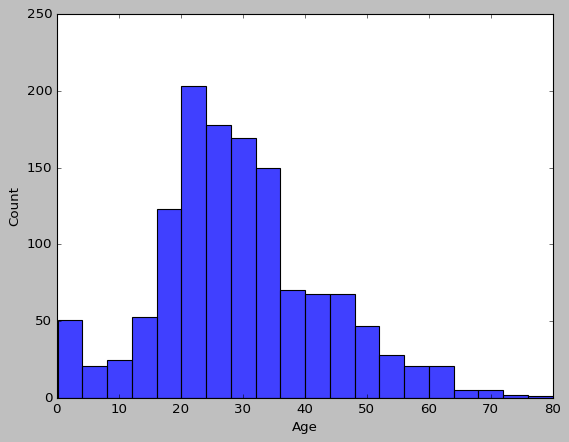

In [75]:
subplot_2 = sns.histplot(titanic.Age, bins=20)

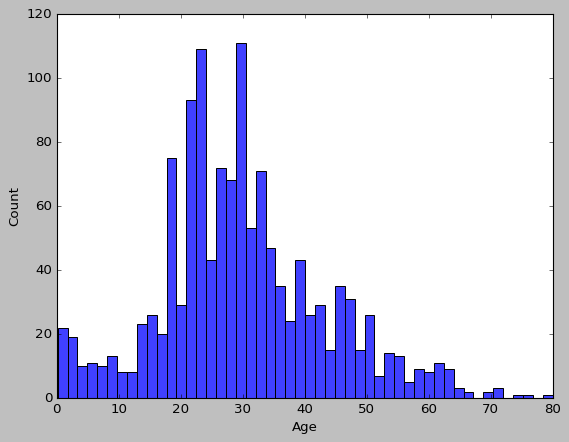

In [76]:
subplot_3 = sns.histplot(titanic.Age, bins=50)

#### Whether the bin size affects your plot? Why?

In [77]:
#your comment here
#Because the range of the bars in the histogram is smaller, so the results are different.  

#### Use seaborn to show the distribution of the column `Age`

<AxesSubplot:xlabel='Age', ylabel='Count'>

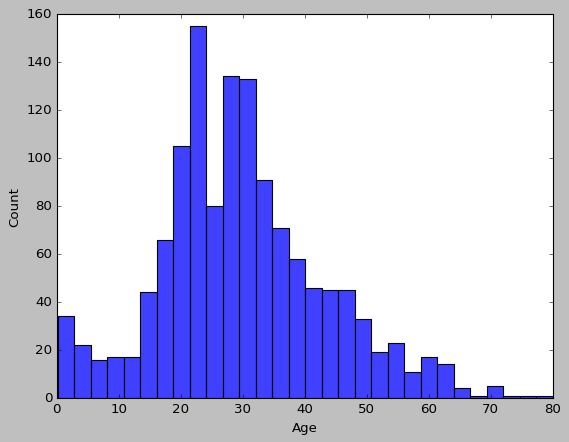

In [78]:
# your code here
sns.histplot(titanic.Age)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

<AxesSubplot:xlabel='Gender', ylabel='count'>

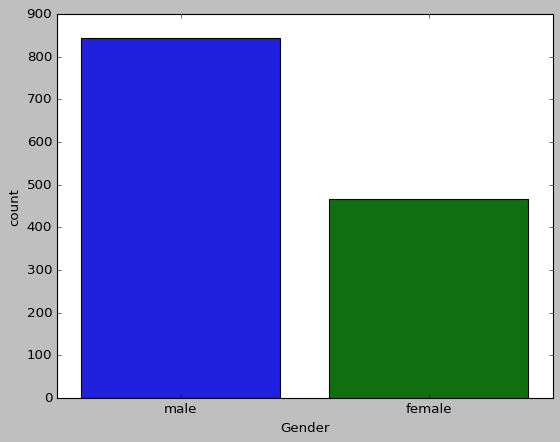

In [79]:
# your code here- 1st way
sns.countplot(x = titanic.Gender)

([<matplotlib.patches.Wedge at 0x12f9251c0>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'Male'),
  Text(0.48083667958064136, -0.9893412391939718, 'Female')])

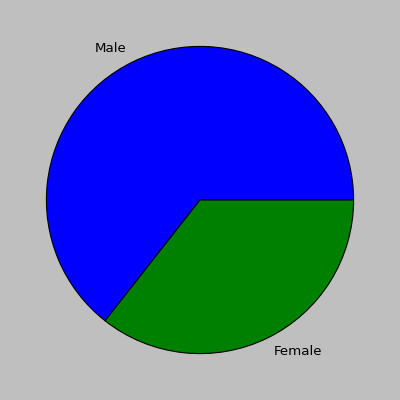

In [80]:
# your code here- 2nd way
labels = "Male", "Female"
plt.pie(titanic.Gender.value_counts(), labels = labels)

#### Use the appropriate plot to visualize the column `Pclass` 


<AxesSubplot:xlabel='Pclass', ylabel='count'>

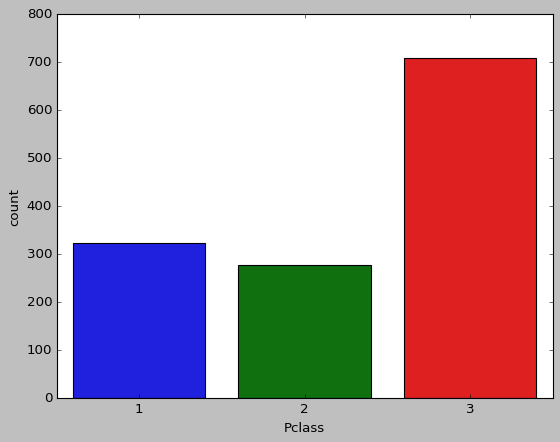

In [81]:
# your code here
sns.countplot(x = titanic.Pclass)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

<AxesSubplot:ylabel='Age'>

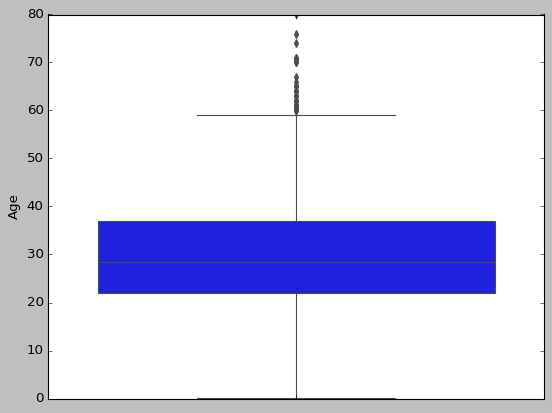

In [82]:
# your code here
sns.boxplot(y="Age", data=titanic)

#### What does the previous plot tell you about the feature `Age`? Comment.

In [83]:
# your comment here
#Median, quartiles 25 and 75 and outliers. 

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

<AxesSubplot:xlabel='Age', ylabel='Density'>

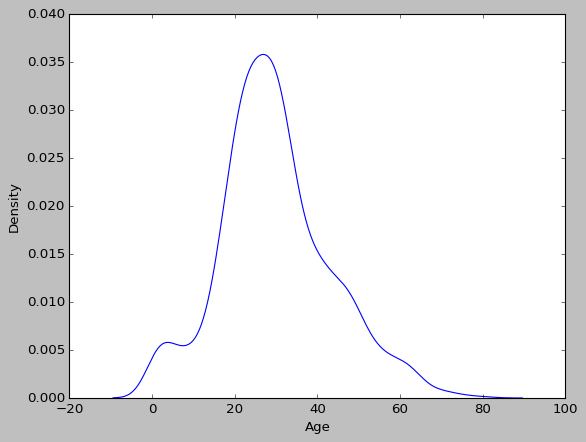

In [84]:
#your code here
sns.kdeplot(x=titanic.Age)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [85]:
#your comment here
#The mode. 

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

<AxesSubplot:xlabel='Age', ylabel='Fare'>

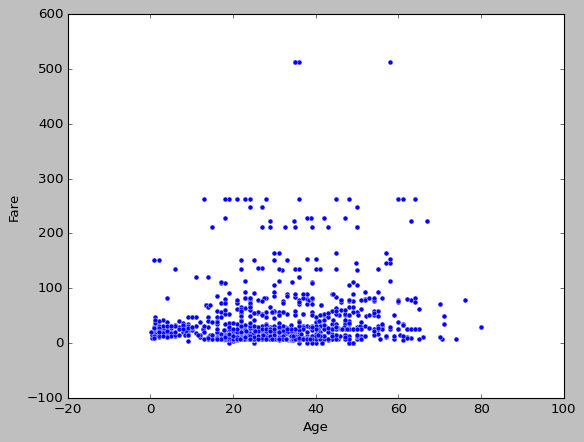

In [86]:
#your code-1st way
sns.scatterplot(x = titanic.Age, y = titanic.Fare)

In [87]:
# your code-2nd way
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

<AxesSubplot:>

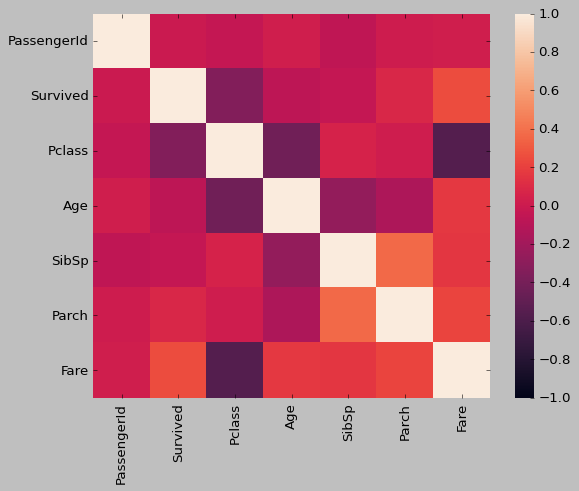

In [88]:
#your code here
sns.heatmap(titanic.select_dtypes(include=[np.number]).corr(), vmin=-1, vmax=1)

#### According to the previous plot, what are the most correlated feature? Comment.

In [89]:
#your comment here
#Fare con Pclass es de las pocas que tienen una correlación mayor a 0.5, siendo esta negativa. 

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

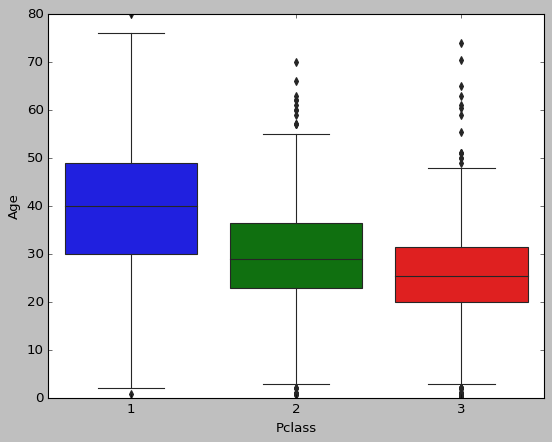

In [90]:
#your code here
sns.boxplot(x = titanic.Pclass, y=titanic.Age)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

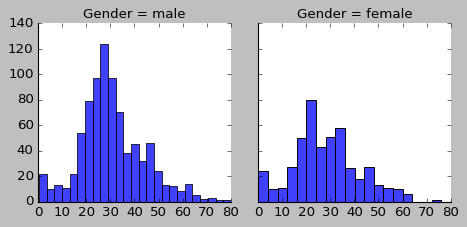

In [91]:
#your code here
g = sns.FacetGrid(data=titanic, col="Gender")
g.map_dataframe(sns.histplot, x="Age")